Importing Required Modules

In [1]:
# DO NOT EDIT
import warnings
warnings.filterwarnings('ignore')
import os
import zipfile
import random
import shutil
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import RMSprop
from shutil import copyfile
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

### Source: https://medium.com/@mr_haseeb/exercise-1-cats-vs-dogs-question-final-week-1-d37a798ce46b

In [2]:
source_path = 'C:/Users/Faiz Haseeb/Desktop/ADIP_Project_Complete/ADIP_proj_canny/temp/dataset1/'

source_path_forge = os.path.join(source_path, 'forge')
source_path_real = os.path.join(source_path, 'real')

# os.listdir returns a list containing all files under the given path
print(f"There are {len(os.listdir(source_path_forge))} images of forged signatures.")
print(f"There are {len(os.listdir(source_path_real))} images of real signatures.")

There are 210 images of forged signatures.
There are 210 images of real signatures.


Creating Train and Test directories

In [3]:
# Root directory Definition
root_dir = 'C:/Users/Faiz Haseeb/Desktop/ADIP_Project_Complete/ADIP_proj_canny/temp/forge-v-real'

# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
    shutil.rmtree(root_dir)

def create_train_test_dirs(root_path):
    """
  Creates directories for the train and test sets
  
  Args:
    root_path (string) - the base directory path to create subdirectories from
  
  Returns:
    None
  """  
    os.makedirs(root_path)
    
    training = os.path.join(root_path, 'training')
    testing = os.path.join(root_path, 'testing')

    os.makedirs(training)
    os.makedirs(testing)
    os.makedirs(os.path.join(training, 'forge'))
    os.makedirs(os.path.join(training, 'real'))
    os.makedirs(os.path.join(testing, 'forge'))
    os.makedirs(os.path.join(testing, 'real'))

    try:
        create_train_test_dirs(root_dir)
    except FileExistsError:
        print("You should not be seeing this since the upper directory is removed beforehand")

create_train_test_dirs(root_dir)
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

You should not be seeing this since the upper directory is removed beforehand
C:/Users/Faiz Haseeb/Desktop/ADIP_Project_Complete/ADIP_proj_canny/temp/forge-v-real\testing
C:/Users/Faiz Haseeb/Desktop/ADIP_Project_Complete/ADIP_proj_canny/temp/forge-v-real\training
C:/Users/Faiz Haseeb/Desktop/ADIP_Project_Complete/ADIP_proj_canny/temp/forge-v-real\testing\forge
C:/Users/Faiz Haseeb/Desktop/ADIP_Project_Complete/ADIP_proj_canny/temp/forge-v-real\testing\real
C:/Users/Faiz Haseeb/Desktop/ADIP_Project_Complete/ADIP_proj_canny/temp/forge-v-real\training\forge
C:/Users/Faiz Haseeb/Desktop/ADIP_Project_Complete/ADIP_proj_canny/temp/forge-v-real\training\real


In [4]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    """
    Splits the data into train and test sets

    Args:
      SOURCE_DIR (string): directory path containing the images
      TRAINING_DIR (string): directory path to be used for training
      VALIDATION_DIR (string): directory path to be used for validation
      SPLIT_SIZE (float): proportion of the dataset to be used for training
      
    Returns:
      None
    """

    ### START CODE HERE
    lst = []
    for i in os.listdir(SOURCE):
      if os.path.getsize(os.path.join(SOURCE, i)) != 0:
        lst.append(i)
      else:
        print(i, "is zero length, so ignoring.")

    
        
    indices = random.sample(lst, len(lst))
    indices_train = indices[0:int(SPLIT_SIZE * len(lst))]
    indices_test = indices[int(SPLIT_SIZE * len(lst)):]
    for i in range(len(indices_train)):
      copyfile(os.path.join(SOURCE, indices_train[i]), os.path.join(os.path.join(SOURCE, TRAINING), indices_train[i]))
    for i in range(len(indices_test)):
      copyfile(os.path.join(SOURCE, indices_test[i]), os.path.join(os.path.join(SOURCE, TESTING), indices_test[i]))
    
    




There are 147 images of forge for training
There are 147 images of real for training
There are 63 images of forge for testing
There are 63 images of real for testing


(Text(0.5, 1.0, 'Edge Detected Image'), ([], []), ([], []))

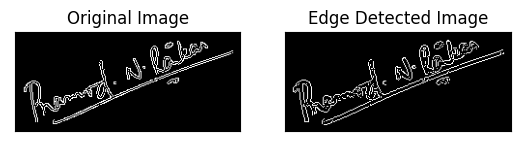

In [5]:

# Define paths
forge_SOURCE_DIR = "C:/Users/Faiz Haseeb/Desktop/ADIP_Project_Complete/ADIP_proj_canny/temp/dataset1/forge/"
real_SOURCE_DIR = "C:/Users/Faiz Haseeb/Desktop/ADIP_Project_Complete/ADIP_proj_canny/temp/dataset1/real/"

TRAINING_DIR = "C:/Users/Faiz Haseeb/Desktop/ADIP_Project_Complete/ADIP_proj_canny/temp/forge-v-real/training/"
TESTING_DIR = "C:/Users/Faiz Haseeb/Desktop/ADIP_Project_Complete/ADIP_proj_canny/temp/forge-v-real/testing/"

TRAINING_forge_DIR = os.path.join(TRAINING_DIR, "forge/")
TESTING_forge_DIR = os.path.join(TESTING_DIR, "forge/")

TRAINING_real_DIR = os.path.join(TRAINING_DIR, "real/")
TESTING_real_DIR = os.path.join(TESTING_DIR, "real/")

# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_forge_DIR)) > 0:
  for file in os.scandir(TRAINING_forge_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_real_DIR)) > 0:
  for file in os.scandir(TRAINING_real_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_forge_DIR)) > 0:
  for file in os.scandir(TESTING_forge_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_real_DIR)) > 0:
  for file in os.scandir(TESTING_real_DIR):
    os.remove(file.path)

# Define proportion of images used for training
split_size = .7

# Run the function
# NOTE: Messages about zero length images should be printed out
split_data(forge_SOURCE_DIR, TRAINING_forge_DIR, TESTING_forge_DIR, split_size)
split_data(real_SOURCE_DIR, TRAINING_real_DIR, TESTING_real_DIR, split_size)

# Applying edge detection to the testing and training images
for i in range(len(os.listdir(TRAINING_forge_DIR))):

  #getting the images path
  image_name = os.listdir(TRAINING_forge_DIR)[i]
  image_path = os.path.join(TRAINING_forge_DIR, image_name)

  #reading the image and performing edge detection on it
  img = cv.imread(image_path)
  img =  cv.Canny(img, 100, 200)
  
  #saving the edge detected image (overwriting original)
  cv.imwrite(image_path,img)


for i in range(len(os.listdir(TRAINING_real_DIR))):
  
  #getting the images path
  image_name = os.listdir(TRAINING_real_DIR)[i]
  image_path = os.path.join(TRAINING_real_DIR, image_name)

  #reading the image and performing edge detection on it
  img = cv.imread(image_path)
  img =  cv.Canny(img, 100, 200)
  
  #saving the edge detected image (overwriting original)
  cv.imwrite(image_path,img)

for i in range(len(os.listdir(TESTING_forge_DIR))):
  
  #getting the images path
  image_name = os.listdir(TESTING_forge_DIR)[i]
  image_path = os.path.join(TESTING_forge_DIR, image_name)

  #reading the image and performing edge detection on it
  img = cv.imread(image_path)
  img =  cv.Canny(img, 100, 200)
  
  #saving the edge detected image (overwriting original)
  cv.imwrite(image_path,img)

for i in range(len(os.listdir(TESTING_real_DIR))):

  #getting the images path
  image_name = os.listdir(TESTING_real_DIR)[i]
  image_path = os.path.join(TESTING_real_DIR, image_name)

  #reading the image and performing edge detection on it
  img = cv.imread(image_path)
  img =  cv.Canny(img, 100, 200)
  
  #saving the edge detected image (overwriting original)
  cv.imwrite(image_path,img)


# Check that the number of images matches the expected output
print(f"\n\nThere are {len(os.listdir(TRAINING_forge_DIR))} images of forge for training")
print(f"There are {len(os.listdir(TRAINING_real_DIR))} images of real for training")
print(f"There are {len(os.listdir(TESTING_forge_DIR))} images of forge for testing")
print(f"There are {len(os.listdir(TESTING_real_DIR))} images of real for testing")

show_image = os.listdir(TESTING_real_DIR)[4]
image_path = os.path.join(TESTING_real_DIR, show_image)

img = cv.imread(image_path)
img_edge = cv.Canny(img, 100, 200)

plt.subplot(1,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(1,2,2),plt.imshow(img_edge,cmap = 'gray')
plt.title('Edge Detected Image'), plt.xticks([]), plt.yticks([])



In [6]:
TRAINING_DIR = "C:/Users/Faiz Haseeb/Desktop/ADIP_Project_Complete/ADIP_proj_canny/temp/forge-v-real/training/"
VALIDATION_DIR = "C:/Users/Faiz Haseeb/Desktop/ADIP_Project_Complete/ADIP_proj_canny/temp/forge-v-real/testing/"

def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  """
  Creates the training and validation data generators
  
  Args:
    TRAINING_DIR (string): directory path containing the training images
    VALIDATION_DIR (string): directory path containing the testing/validation images
    
  Returns:
    train_generator, validation_generator - tuple containing the generators
  """

  # Instantiate the ImageDataGenerator class (don't forget to set the arguments to augment the images)
  train_datagen = ImageDataGenerator(rescale=1/255)

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=10,
                                                      class_mode='binary',
                                                      target_size=(150, 150))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale=1/255)

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                      batch_size=10,
                                                      class_mode='binary',
                                                      target_size=(150, 150))
  
  return train_generator, validation_generator

In [7]:
train_generator, validation_generator = train_val_generators(TRAINING_DIR, TESTING_DIR)

Found 294 images belonging to 2 classes.
Found 126 images belonging to 2 classes.


In [8]:
def create_model():


  model = tf.keras.models.Sequential([ 
    tf.keras.layers.Conv2D(32, (20,20), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (10,10), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (5,5), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (1,1), activation='relu'),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    # Only 1 output neuron.
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  
  model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              metrics=['accuracy']) 

  return model


In [9]:
# Get the untrained model
model = create_model()

# Train the model
# Note that this may take some time.
history = model.fit(train_generator,
                    epochs=15,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/15
30/30 [==============================] - 115s 4s/step - loss: 0.6938 - accuracy: 0.5034 - val_loss: 0.6933 - val_accuracy: 0.5079
Epoch 2/15
30/30 [==============================] - 118s 4s/step - loss: 0.6927 - accuracy: 0.5136 - val_loss: 0.6928 - val_accuracy: 0.5079
Epoch 3/15
30/30 [==============================] - 120s 4s/step - loss: 0.6920 - accuracy: 0.5714 - val_loss: 0.6922 - val_accuracy: 0.5238
Epoch 4/15
30/30 [==============================] - 113s 4s/step - loss: 0.6911 - accuracy: 0.5578 - val_loss: 0.6918 - val_accuracy: 0.5317
Epoch 5/15
30/30 [==============================] - 116s 4s/step - loss: 0.6903 - accuracy: 0.5816 - val_loss: 0.6914 - val_accuracy: 0.5238
Epoch 6/15
30/30 [==============================] - 121s 4s/step - loss: 0.6894 - accuracy: 0.6293 - val_loss: 0.6910 - val_accuracy: 0.5794
Epoch 7/15
30/30 [==============================] - 114s 4s/step - loss: 0.6886 - accuracy: 0.6565 - val_loss: 0.6904 - val_accuracy: 0.5714
Epoch 8/15
30

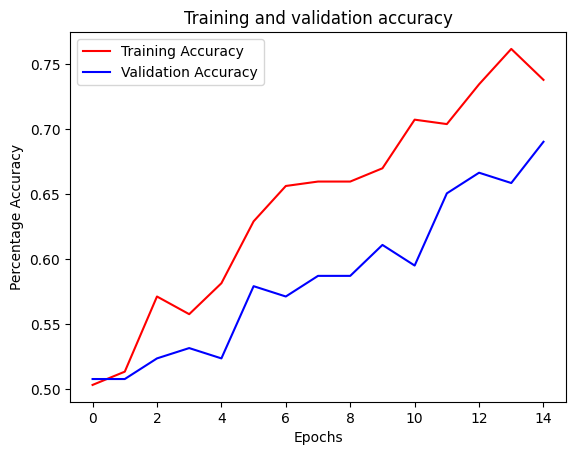

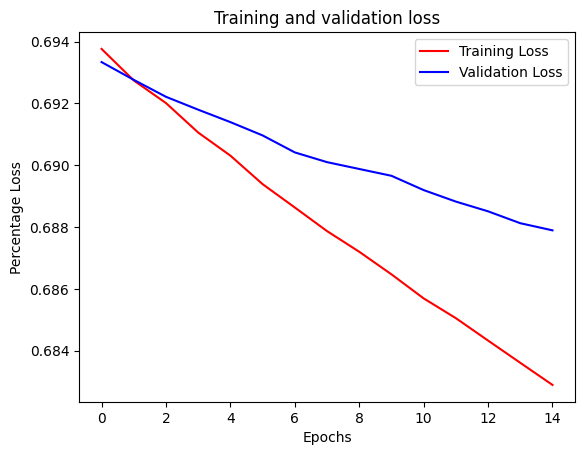

In [10]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', label = "Training Accuracy")
plt.plot(epochs, val_acc, 'b', label = "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.ylabel("Percentage Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r',label = "Training Loss")
plt.plot(epochs, val_loss, 'b', label = "Validation Loss")
plt.title('Training and validation loss')
plt.ylabel("Percentage Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()